In [2]:
import pickle
import torch
import numpy as np
import matplotlib.pyplot as plt

In [3]:
with open("../outputs/AudioMNIST_digit_attributions_fft_10.pkl", "rb") as f:
    attributions = pickle.load(f)

In [4]:
for key in attributions.keys():
    print(key)

saliency
lrp
IG
freqrise_sm_False_batchsize_10_numbatches_300_R_pred_lr_0.0001_alpha_1.0_beta_0.01_decay_0.9_numcells_200_reinforce
predictions
labels
freqrise_sm_False_batchsize_10_numbatches_50_R_pred_lr_0.0001_alpha_1.0_beta_0.01_decay_0.9_numcells_200_reinforce
freqrise_sm_False_batchsize_10_numbatches_100_R_pred_lr_0.0001_alpha_1.0_beta_0.01_decay_0.9_numcells_200_reinforce


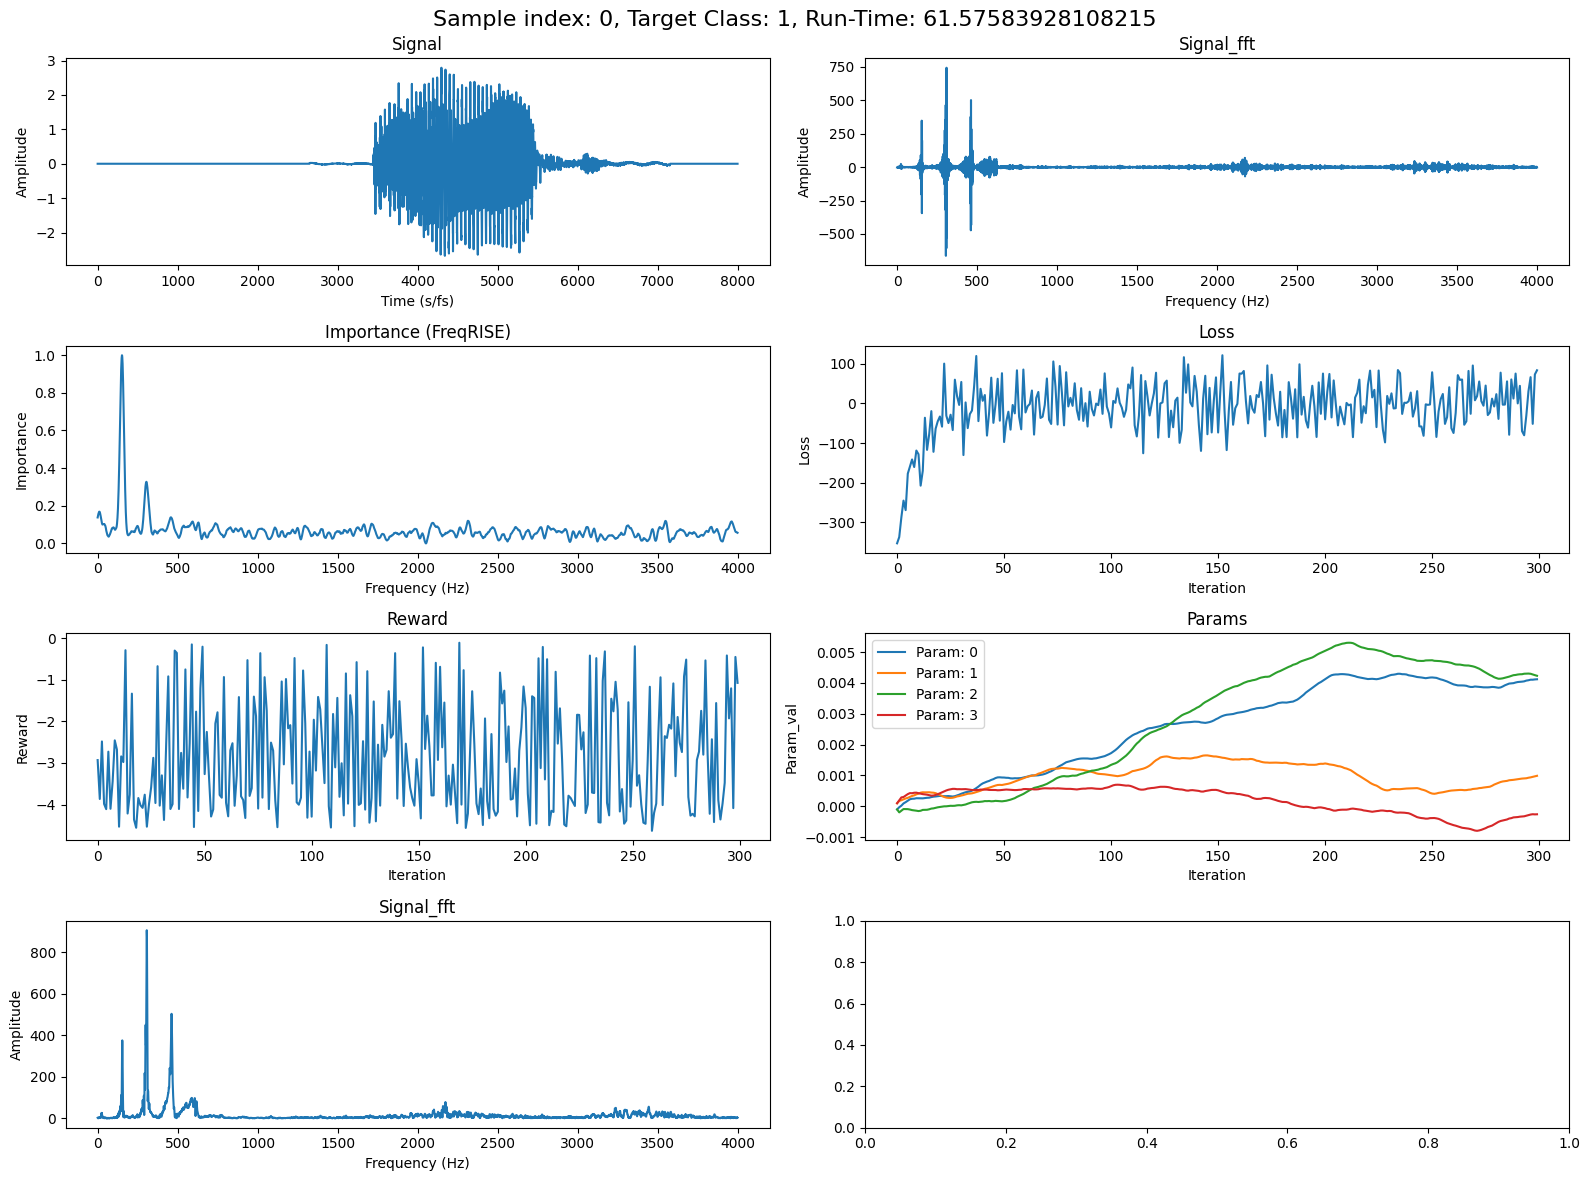

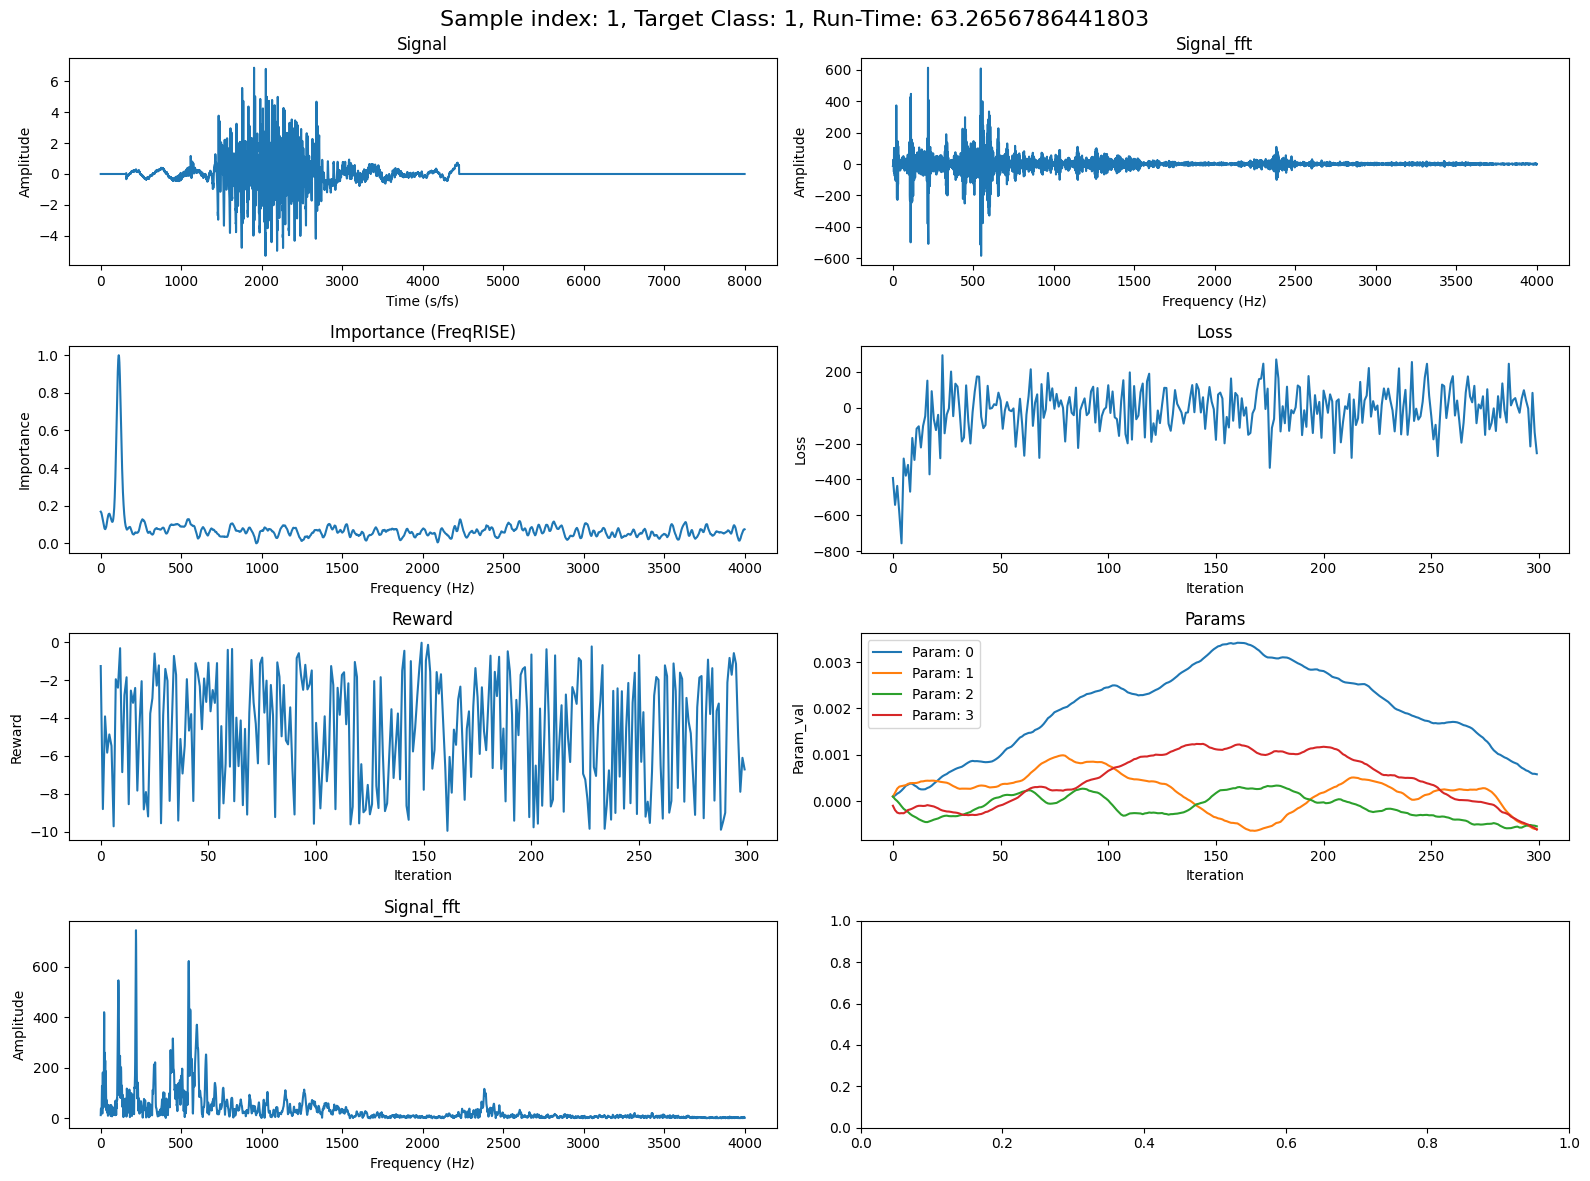

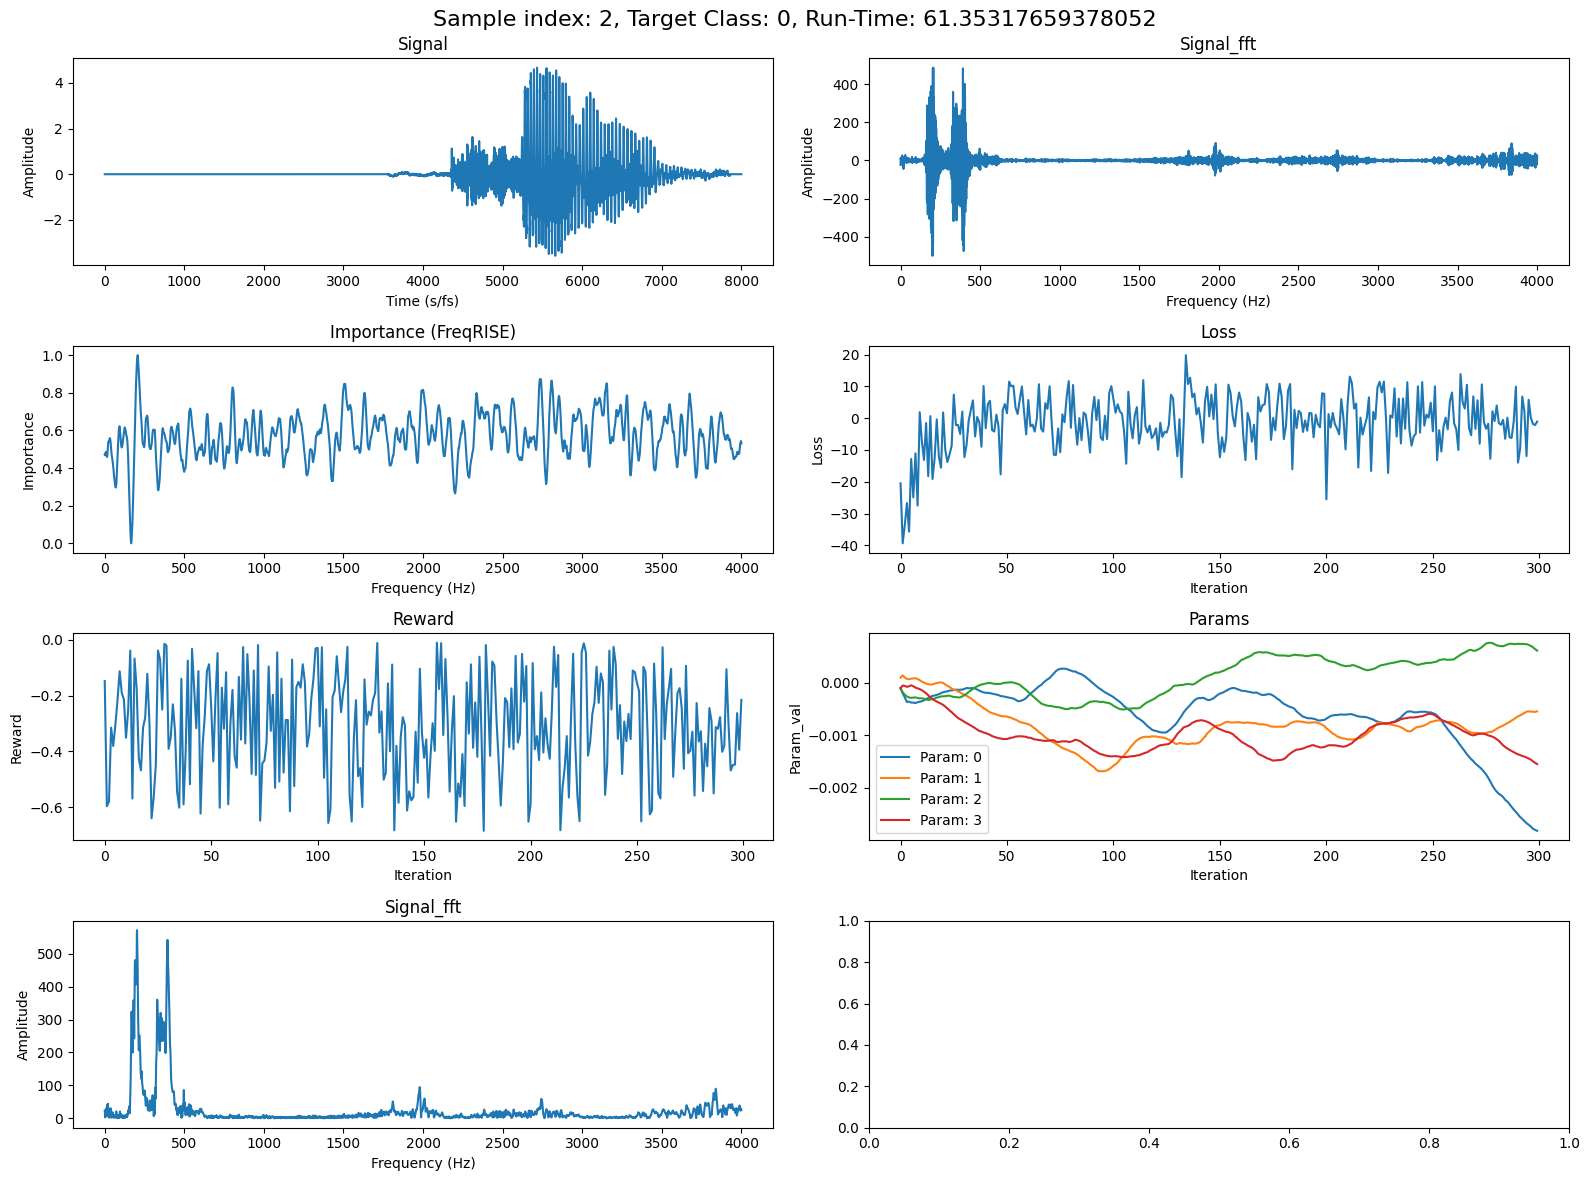

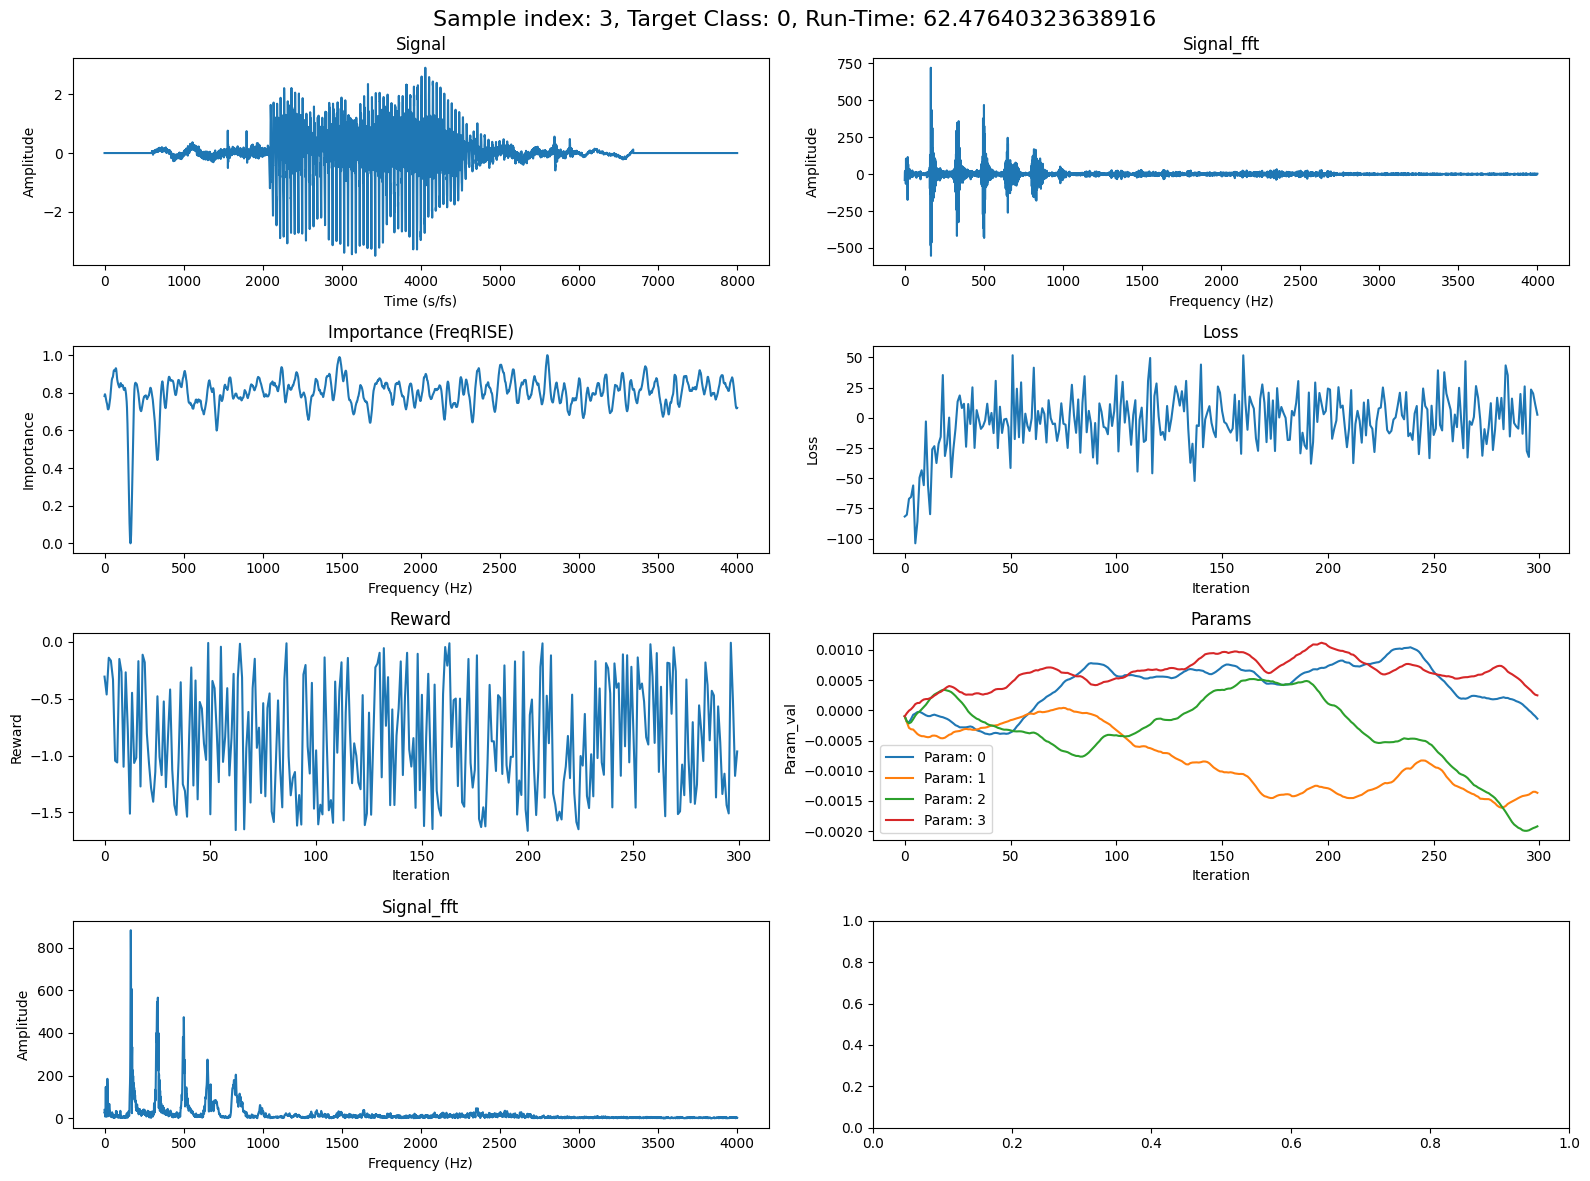

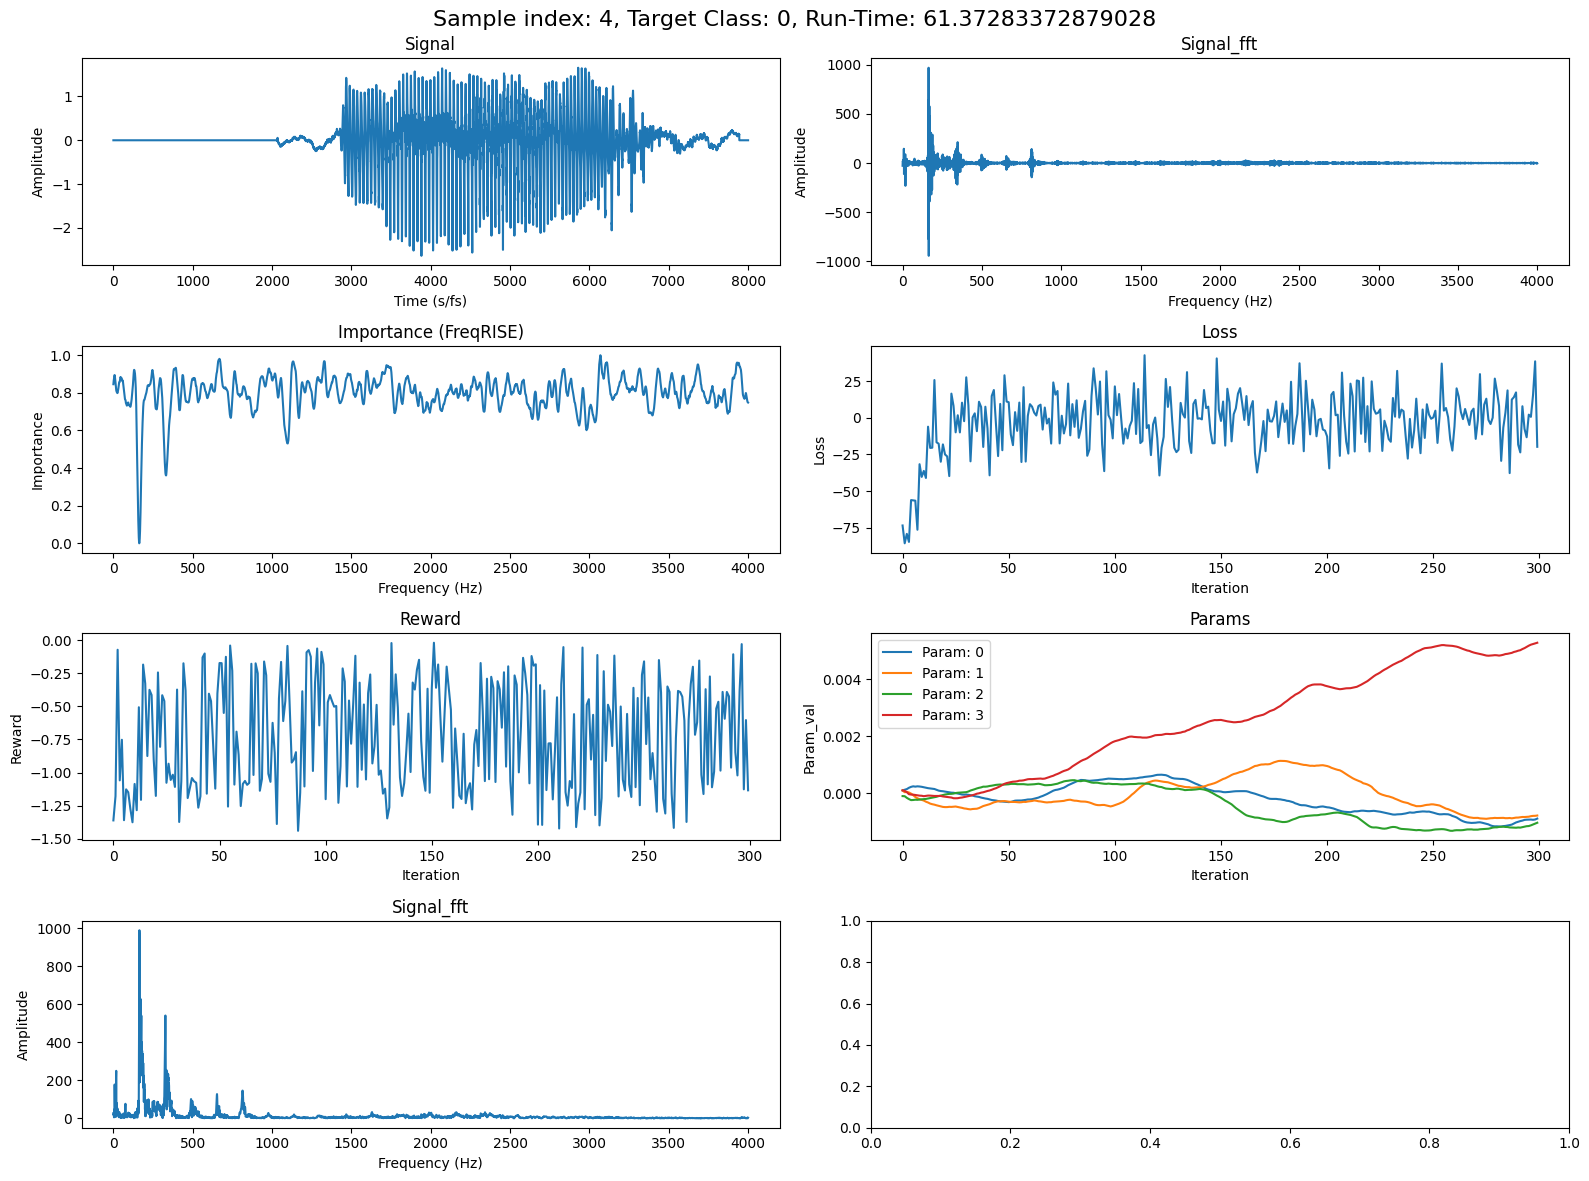

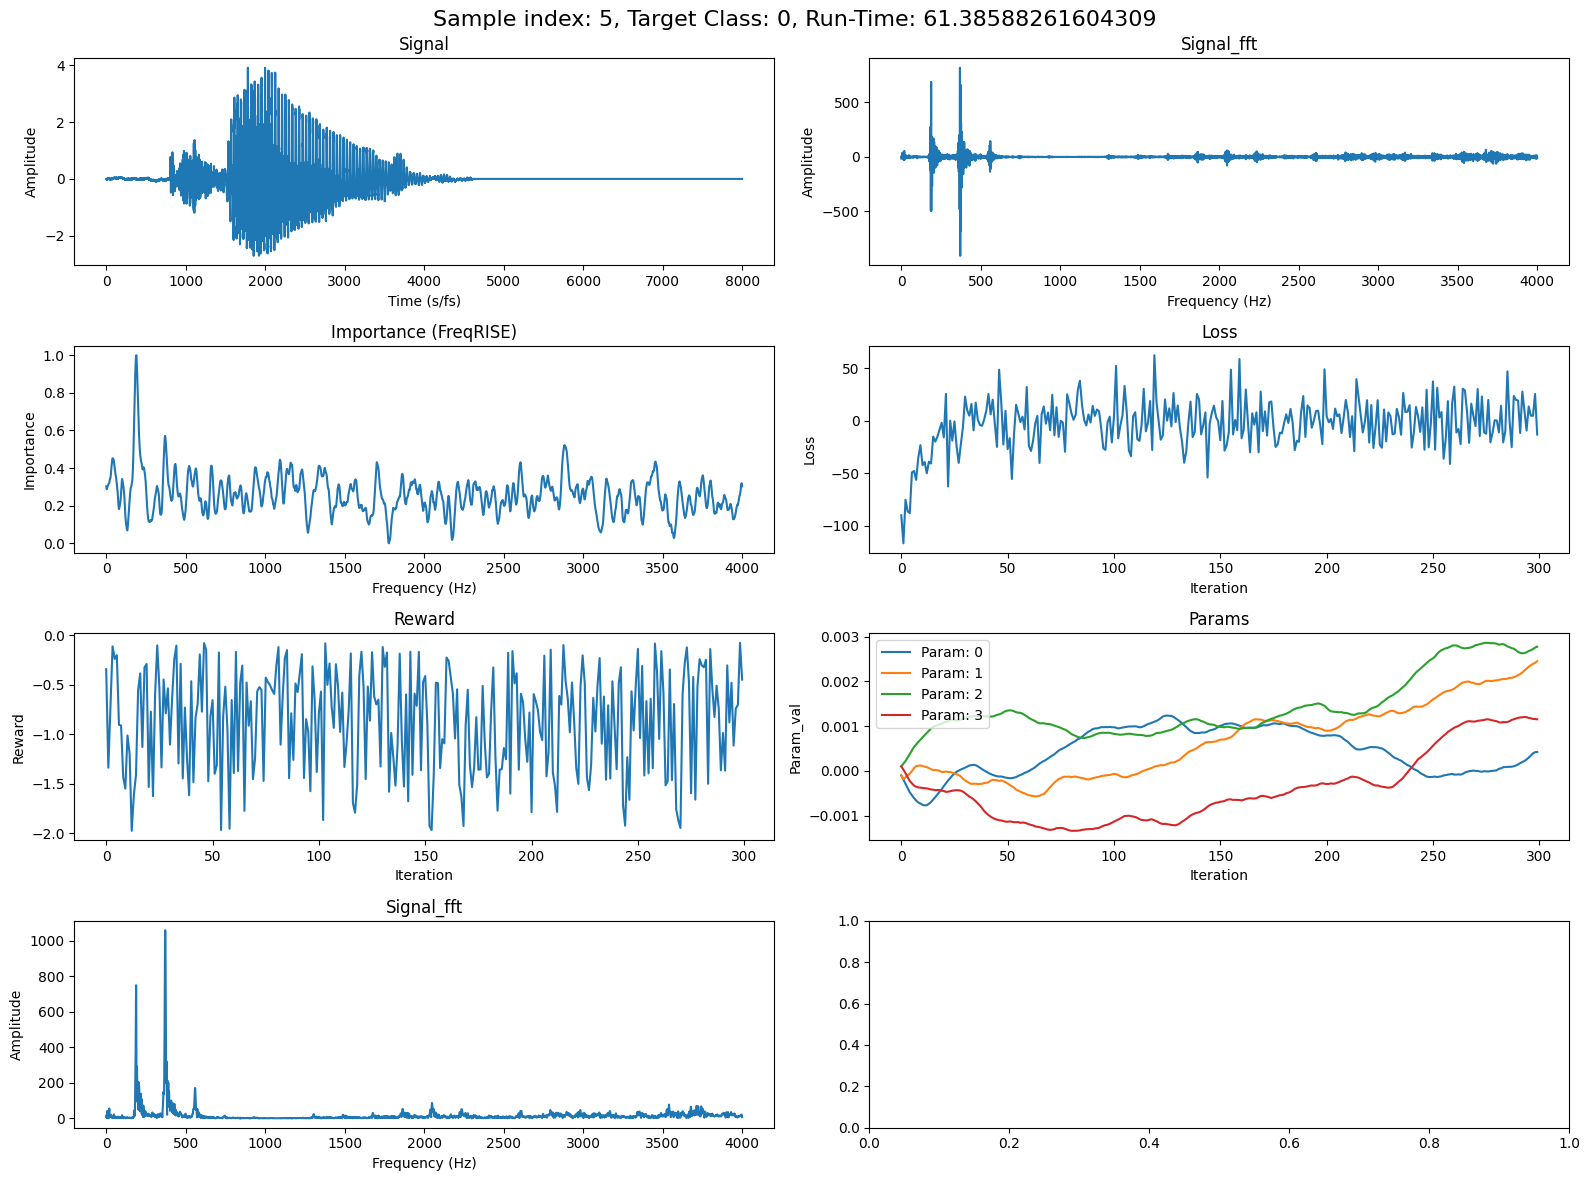

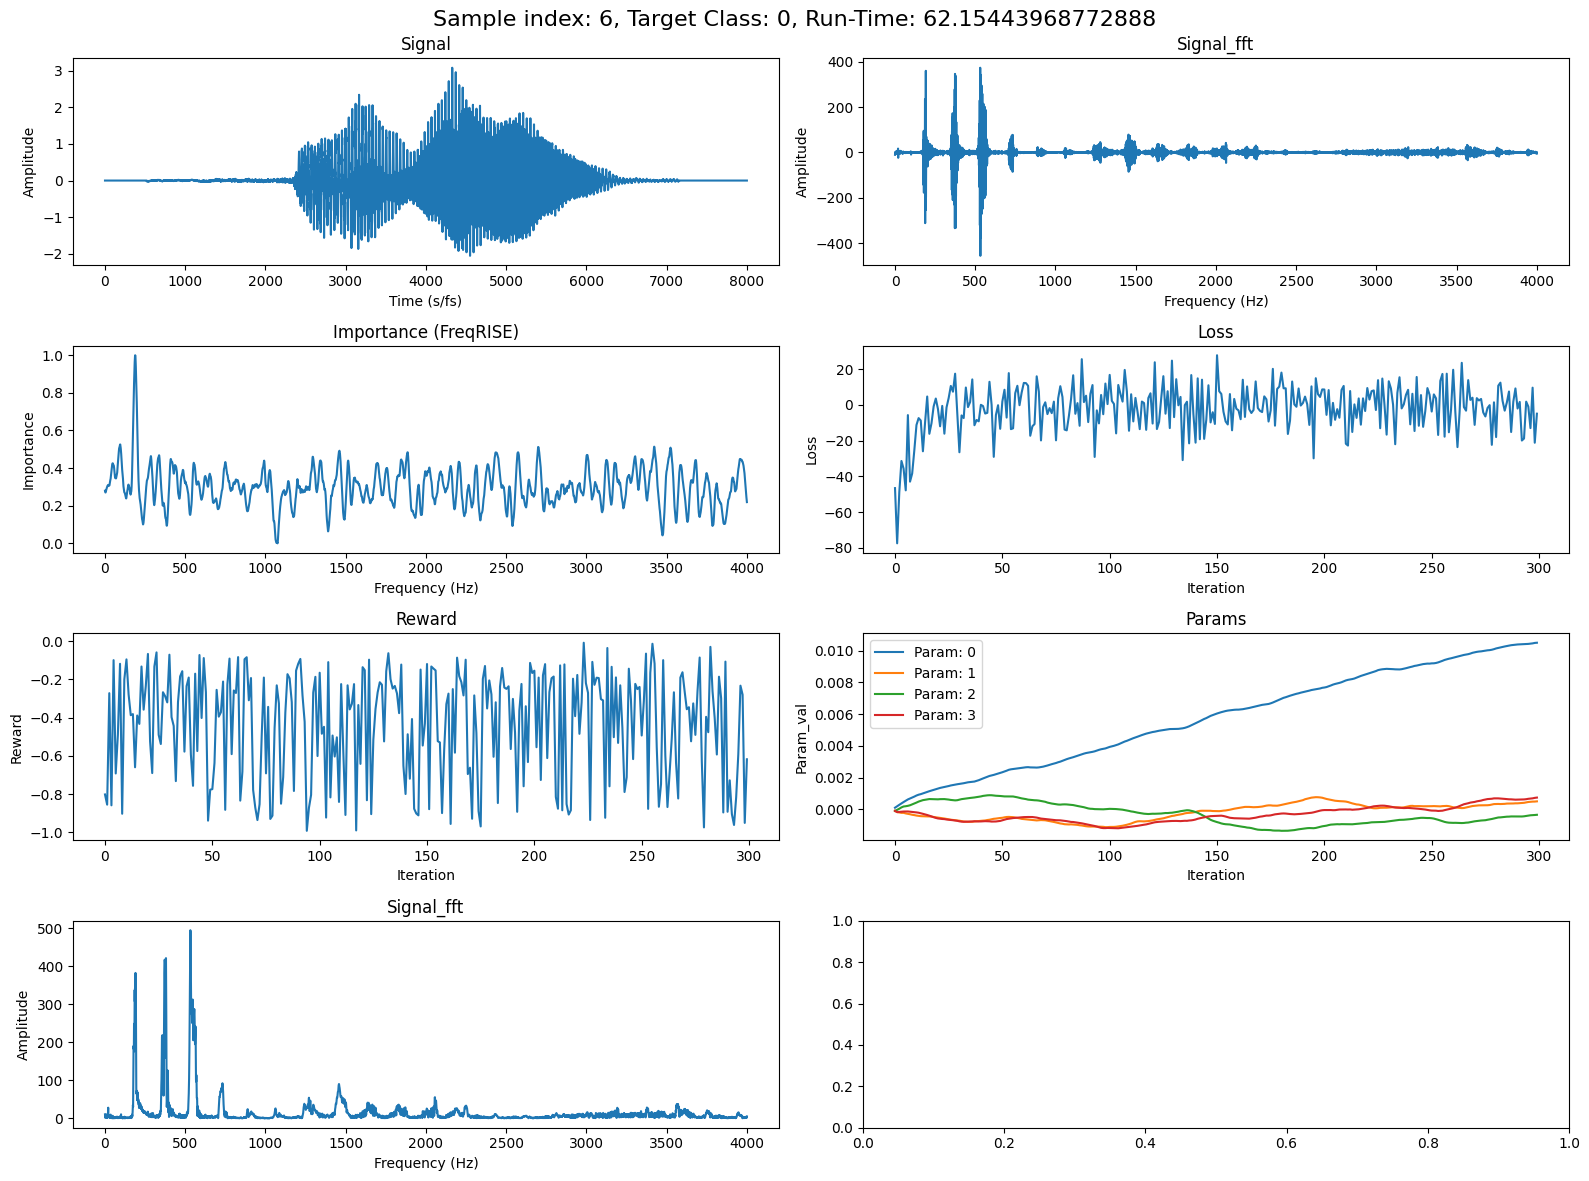

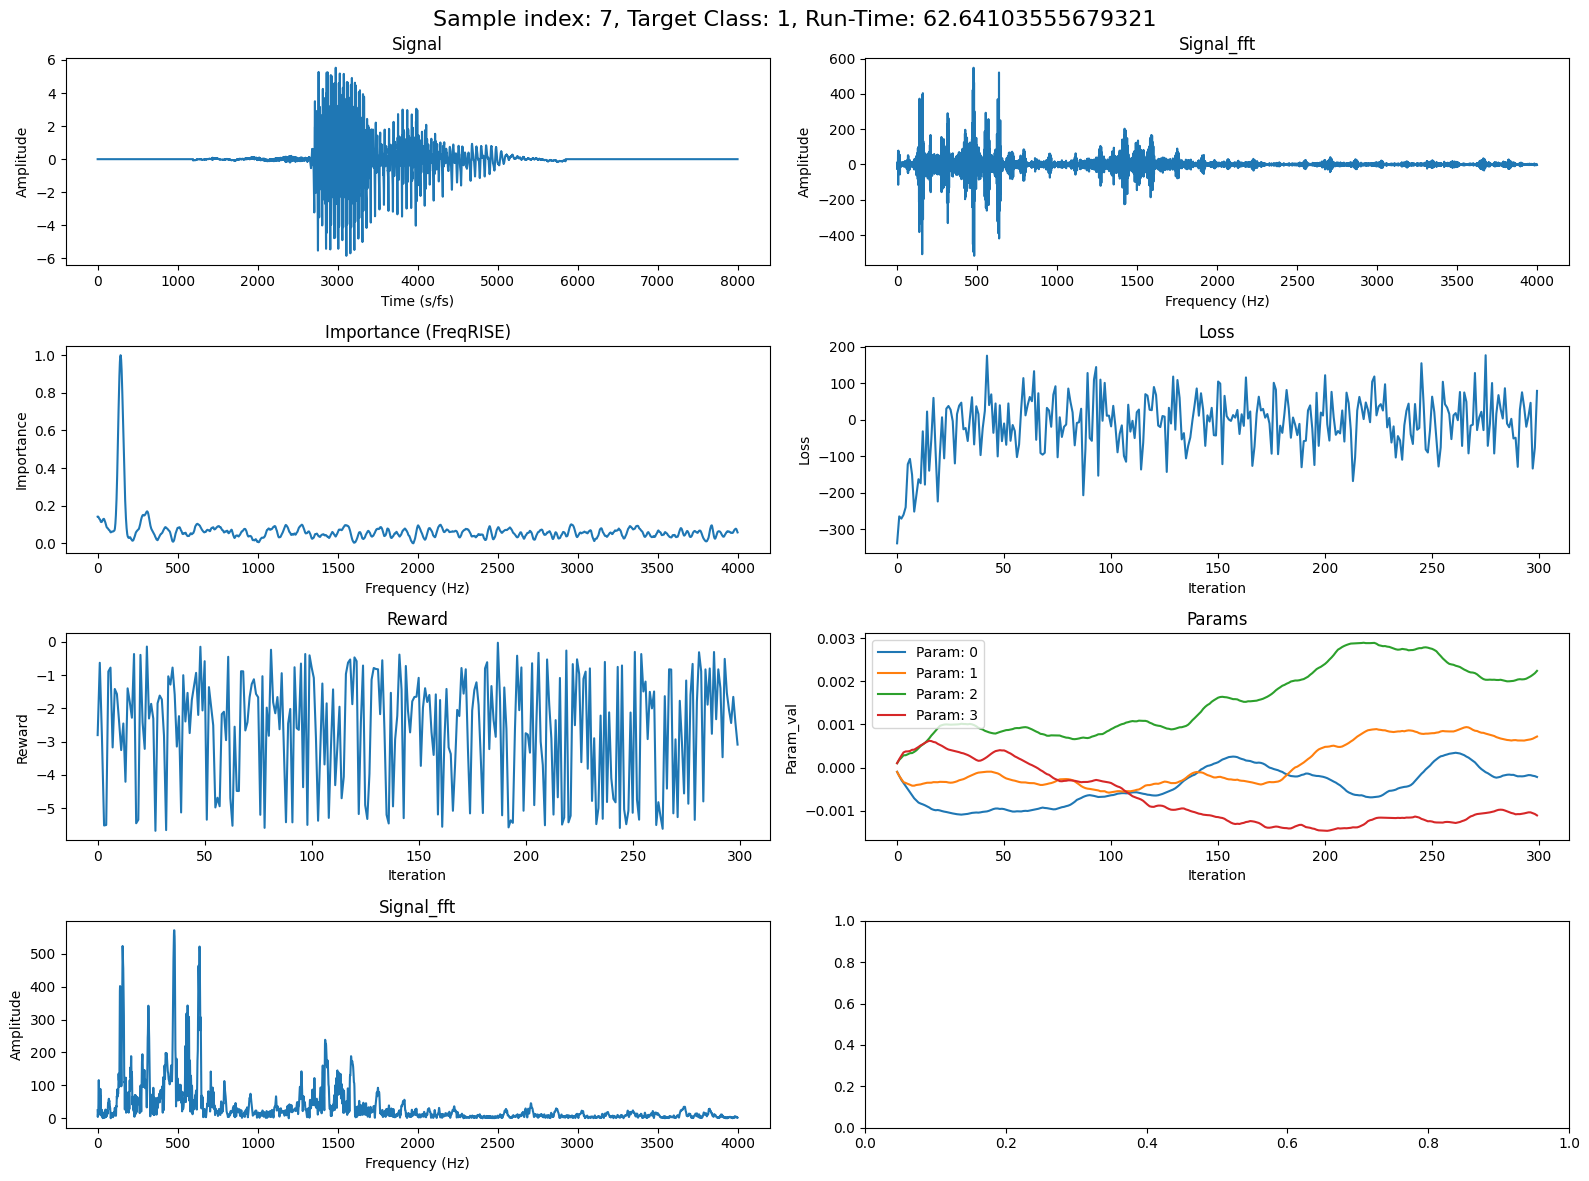

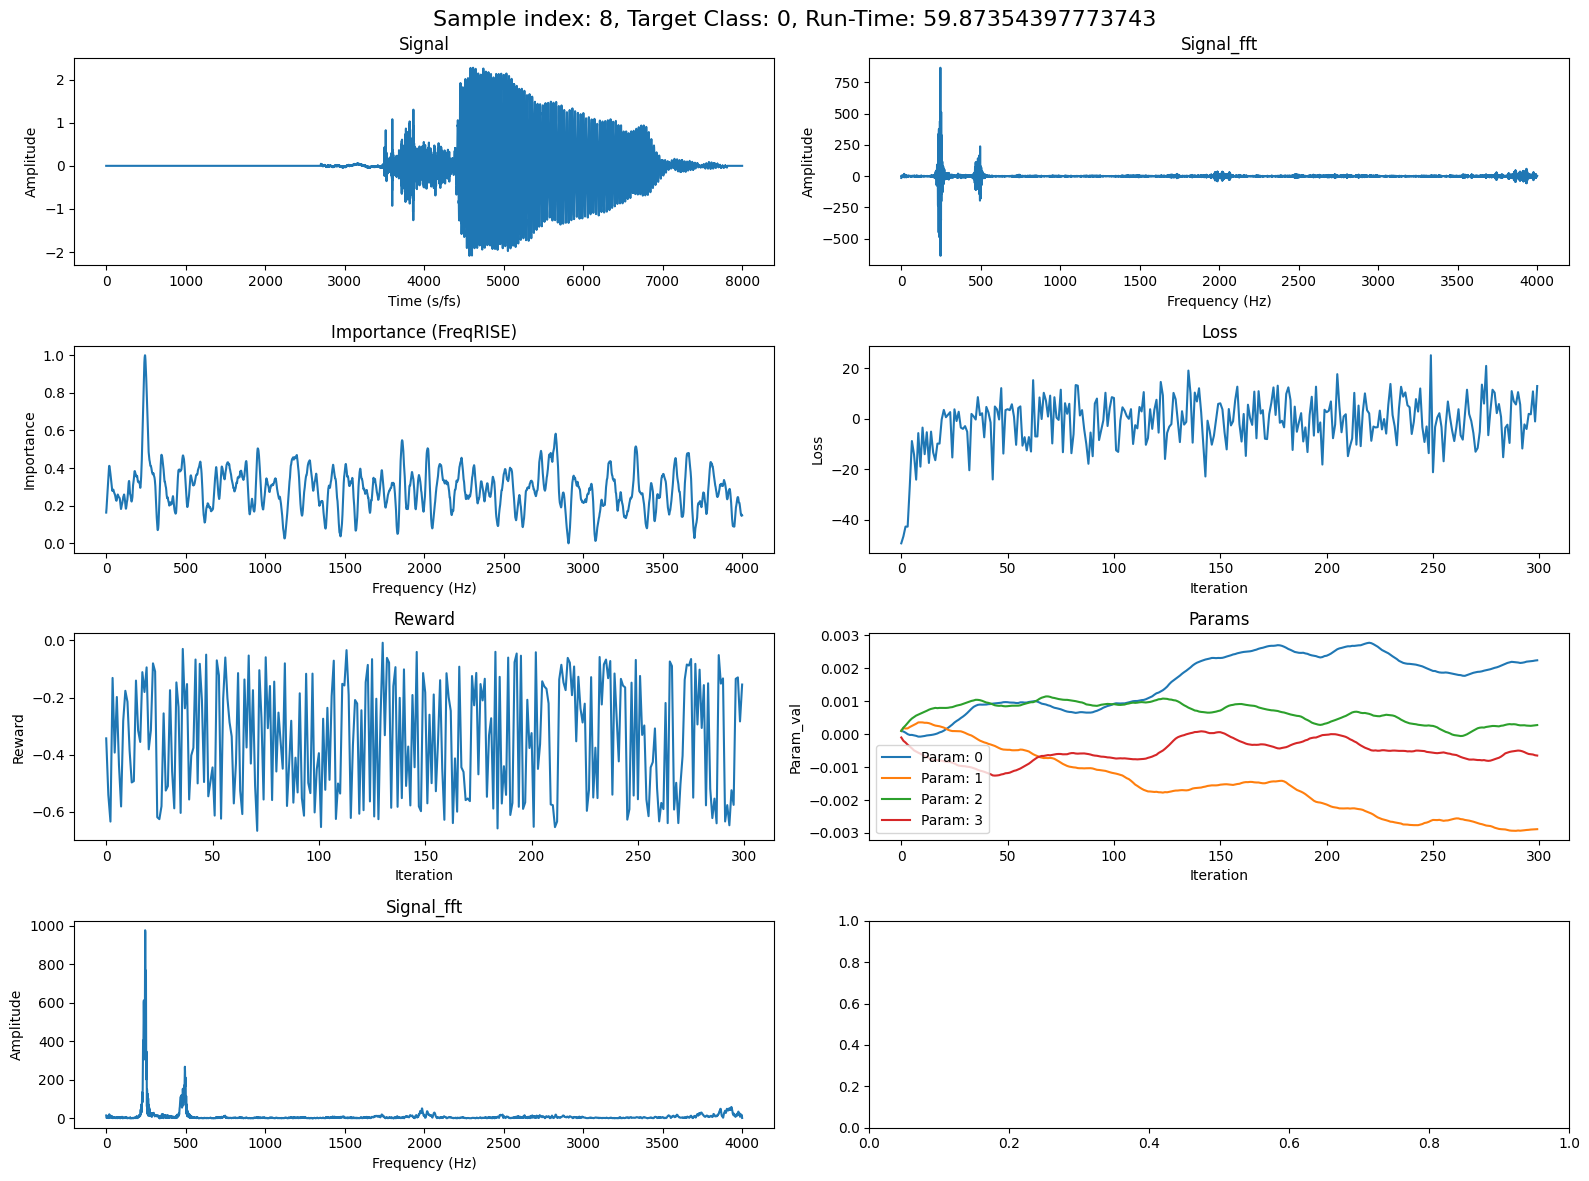

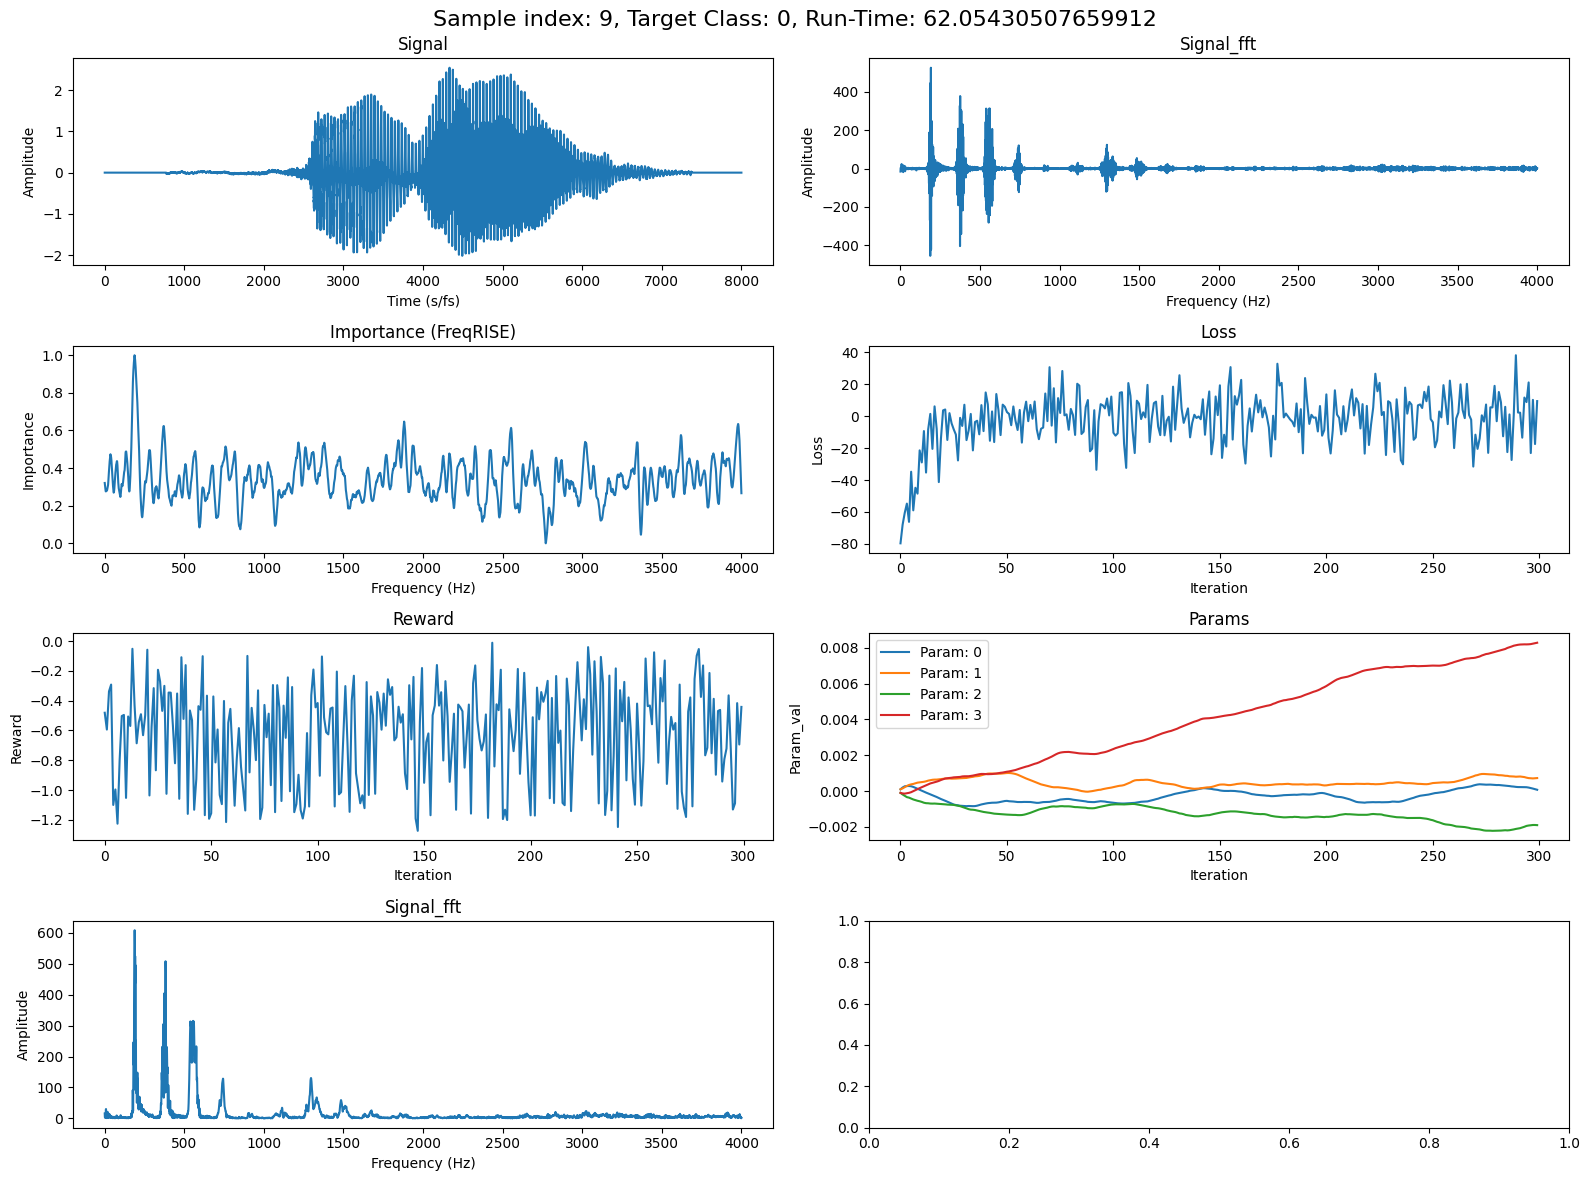

In [16]:
N = 8000 # number of samples in time domain
fs = 8000 # sampling frequency
frequencies = torch.fft.rfftfreq(N, d=1/fs)
times = torch.linspace(0, N, fs)

# Parameters to set for loading the samples:
lr = 0.0001
alpha = 1.0
beta = 0.01
decay = 0.9
use_softmax = False
batchsize = 10 # Number of masks per batch of masks
numbatches = 300 # Number of batches of masks
reward_fn = 'pred'
numcells = 200

for i in range(10):
    with open(f'samples/freqrise_sm_{use_softmax}_batchsize_{batchsize}_numbatches_{numbatches}_R_{reward_fn}_lr_{lr}_alpha_{alpha}_beta_{beta}_decay_{decay}_numcells_{numcells}/sample_idx_{i}.pkl', 'rb') as f:
        sample_dict = pickle.load(f)
    
    signal = sample_dict['signal']
    signal_fft = sample_dict['signal_fft']
    signal_fft_re = sample_dict['signal_fft_re']
    target_class = sample_dict['target_class']
    importance = sample_dict['importance']
    logged_params = sample_dict['logged_params']
    loss = sample_dict['loss']
    reward = sample_dict['rewards']
    run_time = sample_dict['run_time']
    iterations = np.arange(len(loss))
    
    params = []
    for k in range(len(logged_params[0])):
        param = []
        for j in range(len(logged_params)):
            param.append(logged_params[j][k])
        params.append(param)
    
    fig, axs = plt.subplots(4, 2, figsize=(16, 12))
    fig.suptitle(f"Sample index: {i}, Target Class: {target_class}, Run-Time: {run_time}", fontsize=16)
    
    # Plot Signal
    axs[0, 0].plot(times, signal)
    axs[0, 0].set_title("Signal")
    axs[0, 0].set_xlabel("Time (s/fs)")
    axs[0, 0].set_ylabel("Amplitude")

    # Plot transformed signal
    axs[0, 1].plot(frequencies, signal_fft)
    axs[0, 1].set_title("Signal_fft")
    axs[0, 1].set_xlabel("Frequency (Hz)")
    axs[0, 1].set_ylabel("Amplitude")
    
    # Plot importance FreqRISE with Reinforce
    axs[1, 0].plot(frequencies, importance)
    axs[1, 0].set_title("Importance (FreqRISE)")
    axs[1, 0].set_xlabel("Frequency (Hz)")
    axs[1, 0].set_ylabel("Importance")

    # Plot loss
    axs[1, 1].plot(iterations, loss)
    axs[1, 1].set_title("Loss")
    axs[1, 1].set_xlabel("Iteration")
    axs[1, 1].set_ylabel("Loss")
    
    # Plot reward
    axs[2, 0].plot(iterations, reward)
    axs[2, 0].set_title("Reward")
    axs[2, 0].set_xlabel("Iteration")
    axs[2, 0].set_ylabel("Reward")

    # Plot params
    for k, param in enumerate(params):
        axs[2, 1].plot(iterations, param, label=f"Param: {k}")
    axs[2, 1].set_title("Params")
    axs[2, 1].set_xlabel("Iteration")
    axs[2, 1].set_ylabel("Param_val")
    axs[2, 1].legend()
    
    # Plot transformed signal
    axs[3, 0].plot(frequencies, signal_fft_re)
    axs[3, 0].set_title("Signal_fft")
    axs[3, 0].set_xlabel("Frequency (Hz)")
    axs[3, 0].set_ylabel("Amplitude")
    
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_200179/1813361561.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  importance_freqrise = torch.tensor(attributions['freqrise_200_3000_lr_0.001_alpha_1.0_beta_0.01_decay_0.9_reinforce'][0][sample_idx])
/tmp/ipykernel_200179/1813361561.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  importance_lrp = torch.tensor(attributions['lrp'][0][sample_idx][0][0])
/tmp/ipykernel_200179/1813361561.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  importance_IG = torch.tensor(attributions['IG'][0][sample_idx][0][0])
/tmp/ipyke

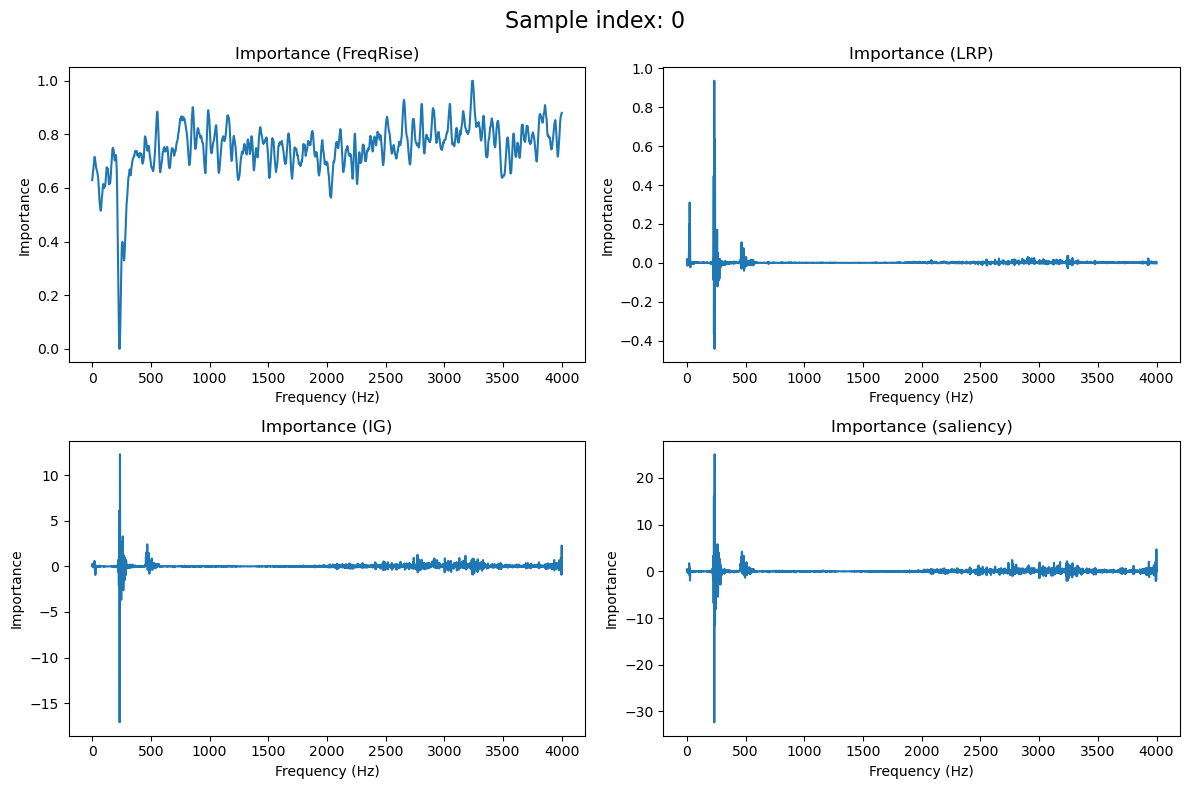

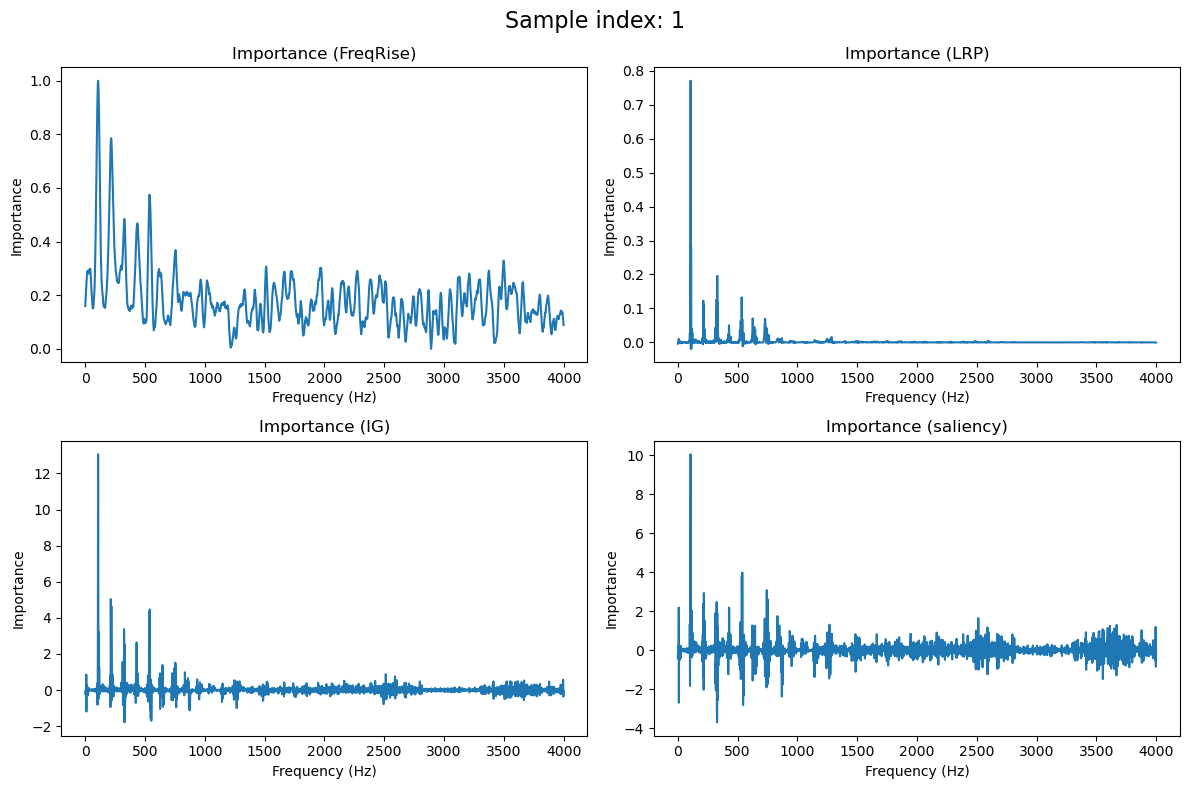

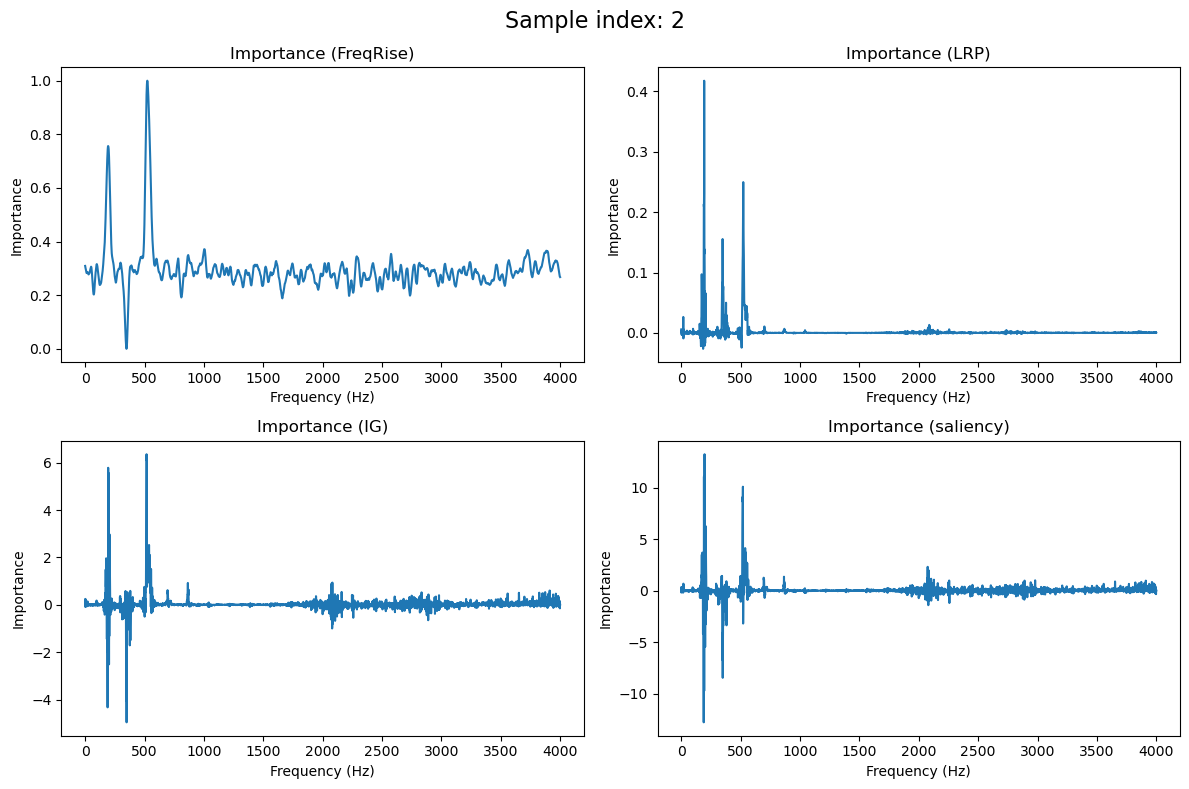

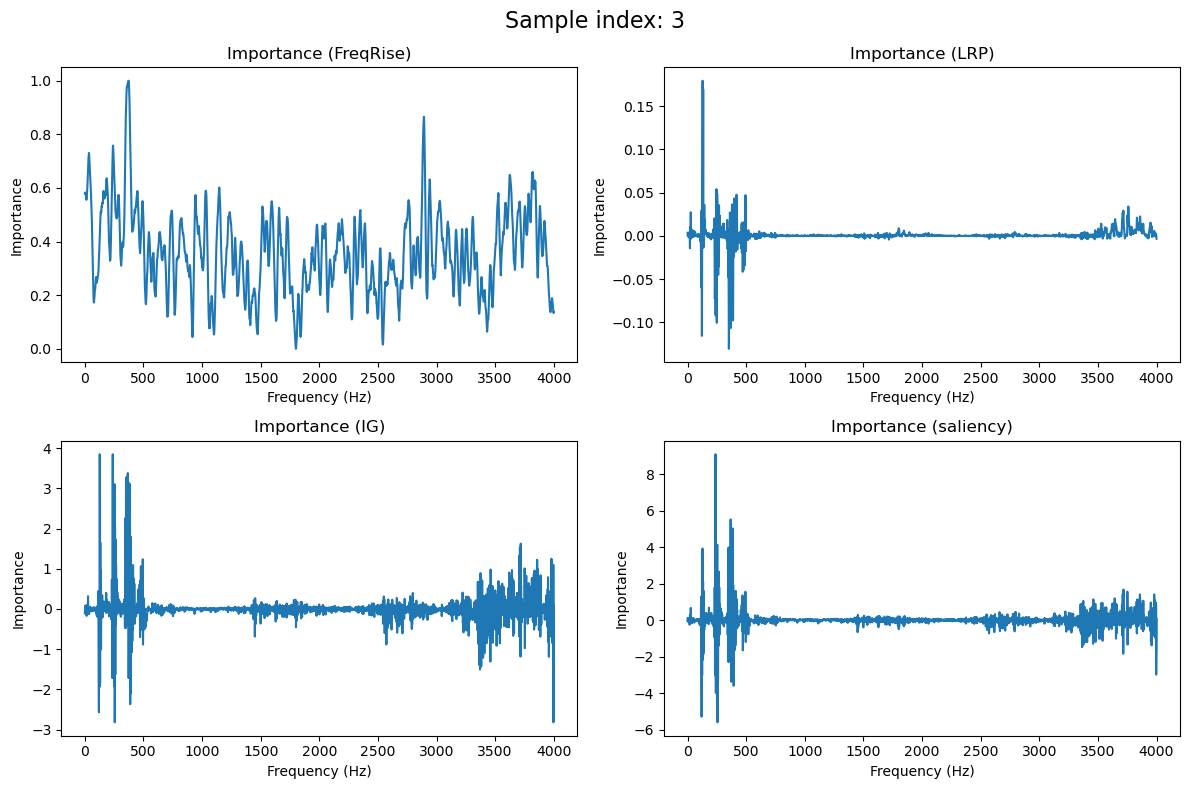

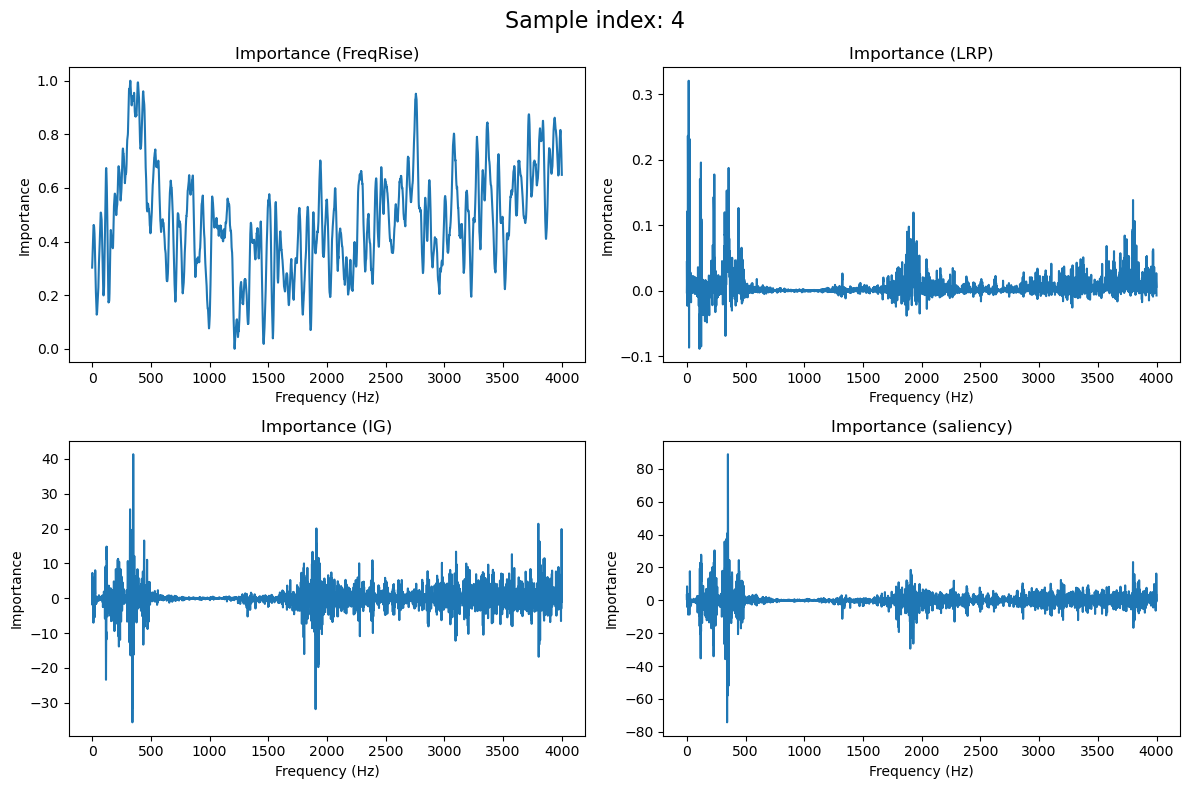

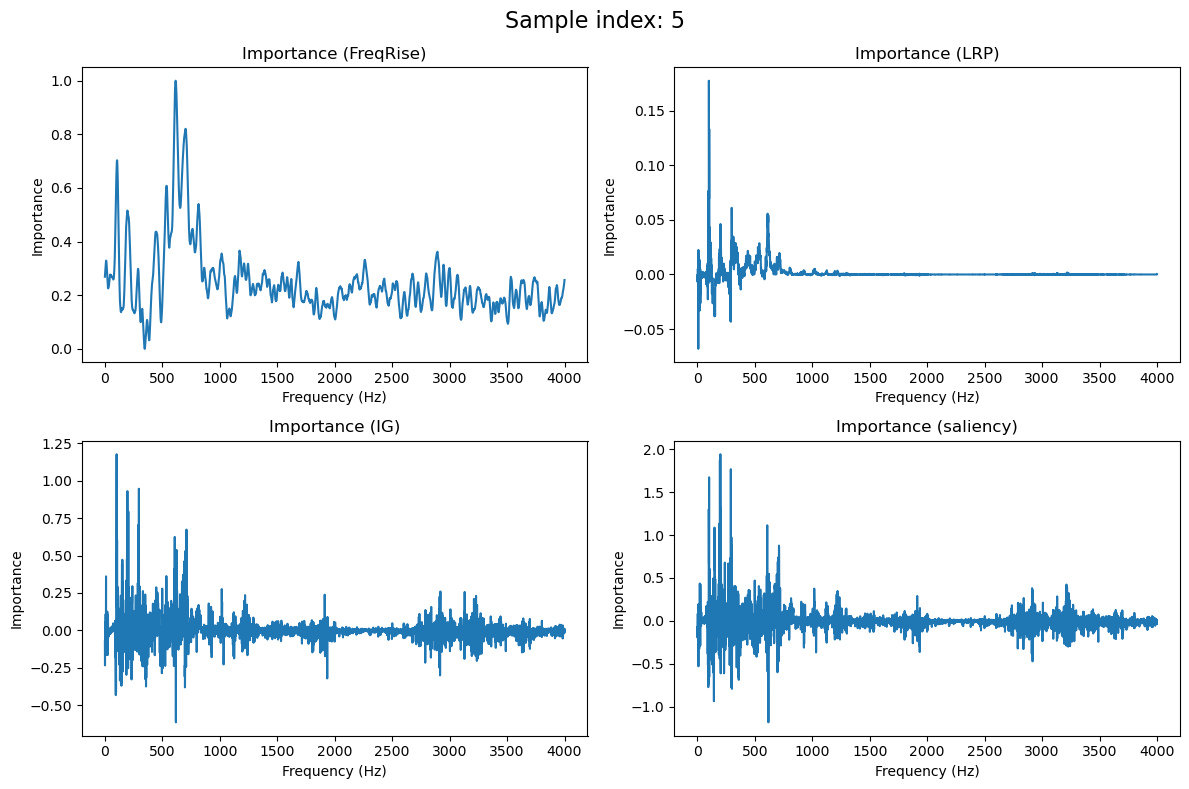

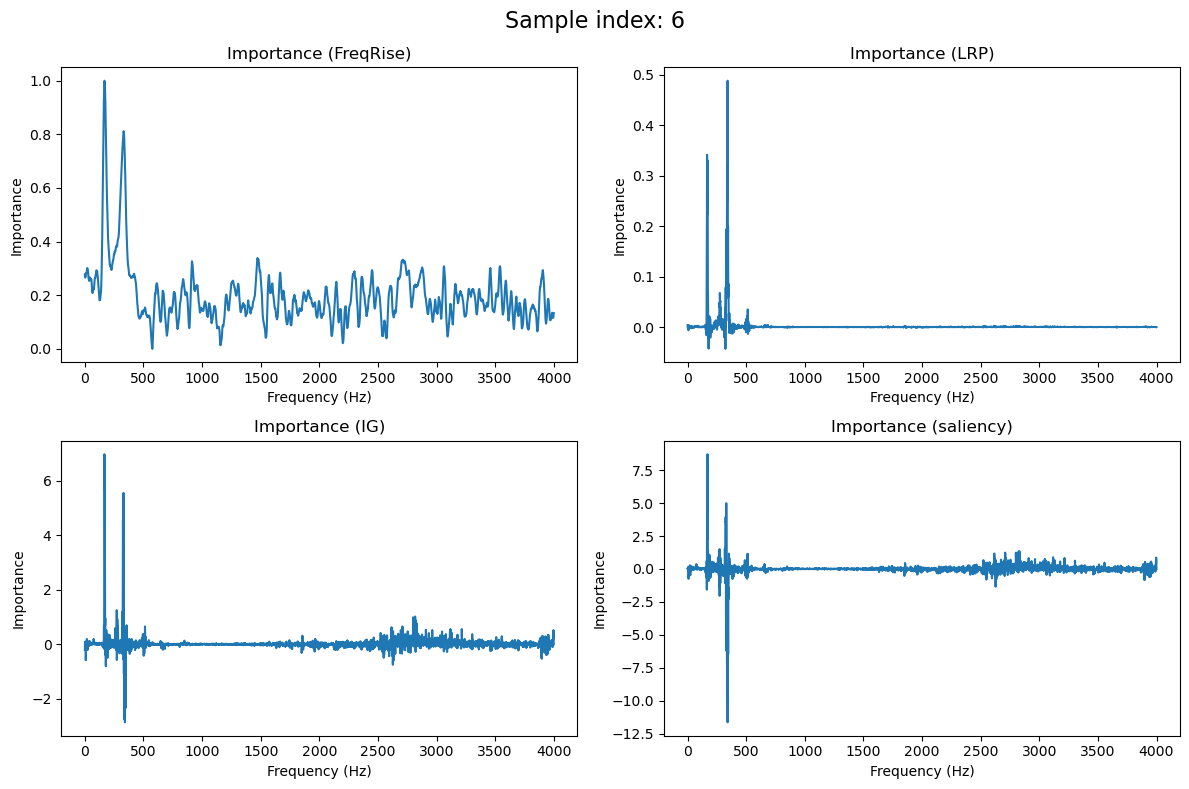

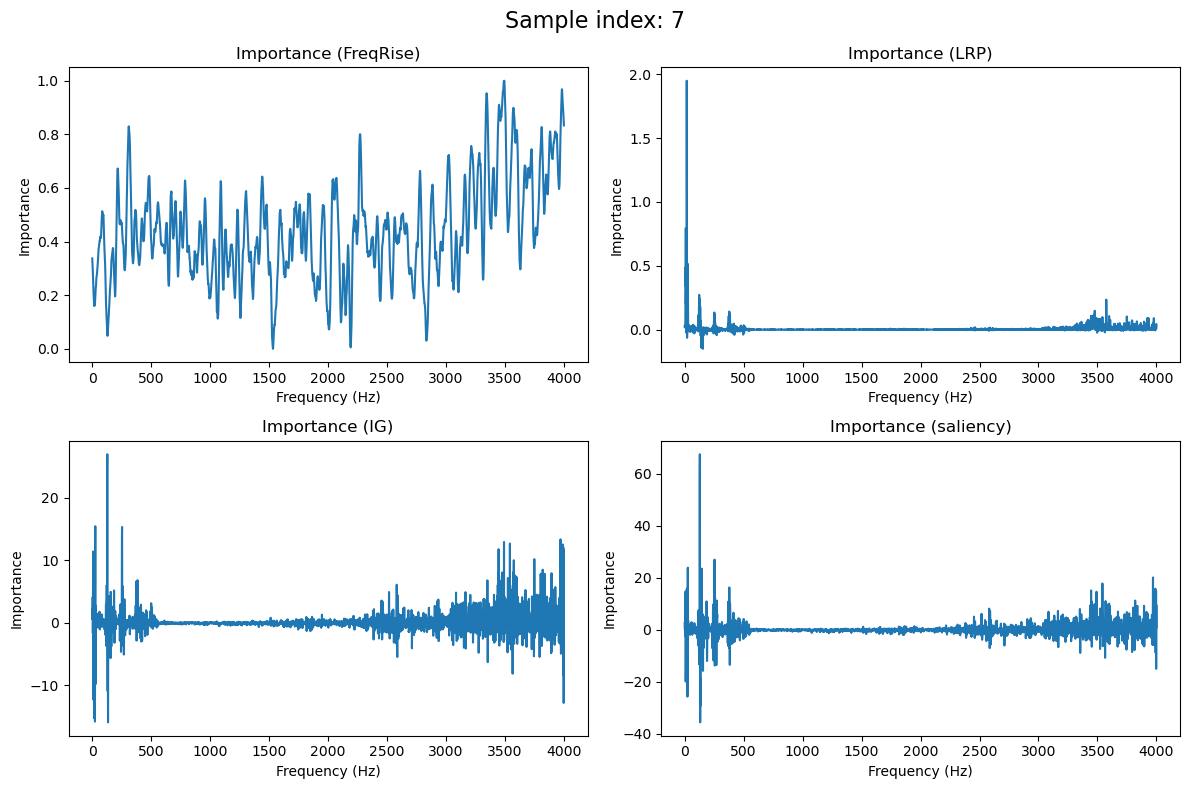

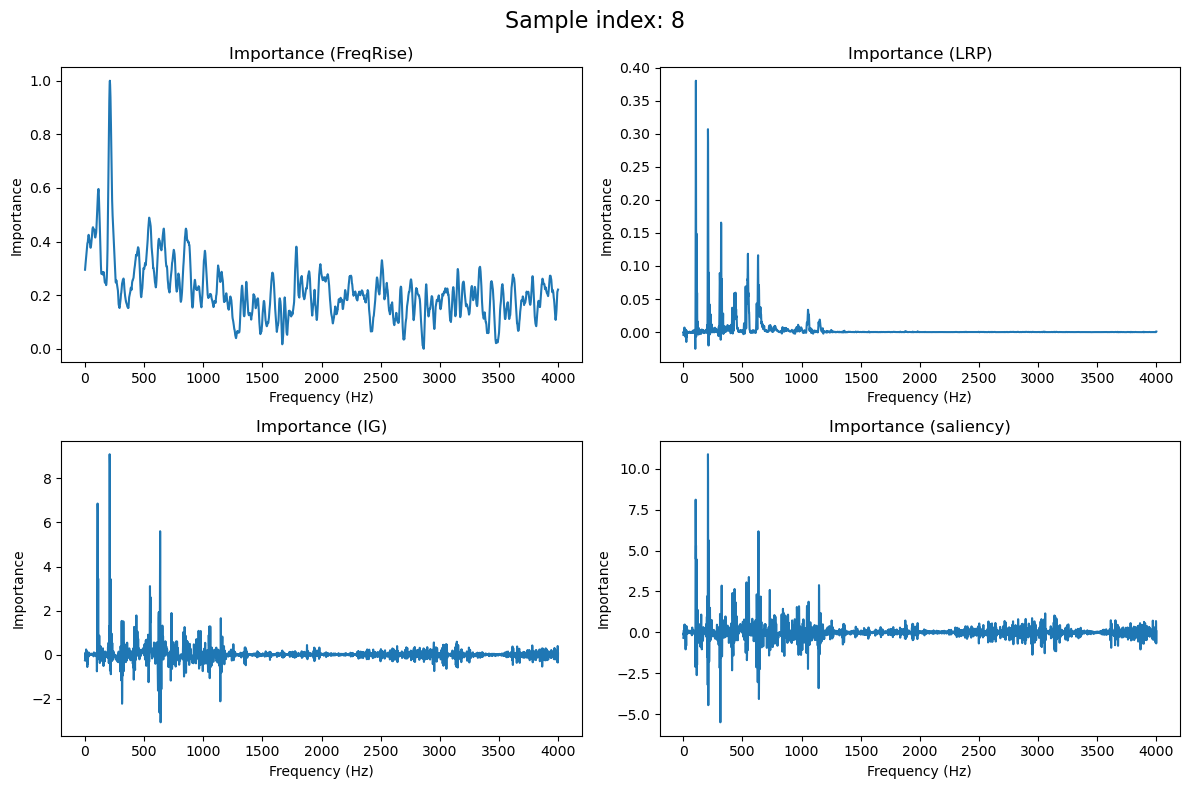

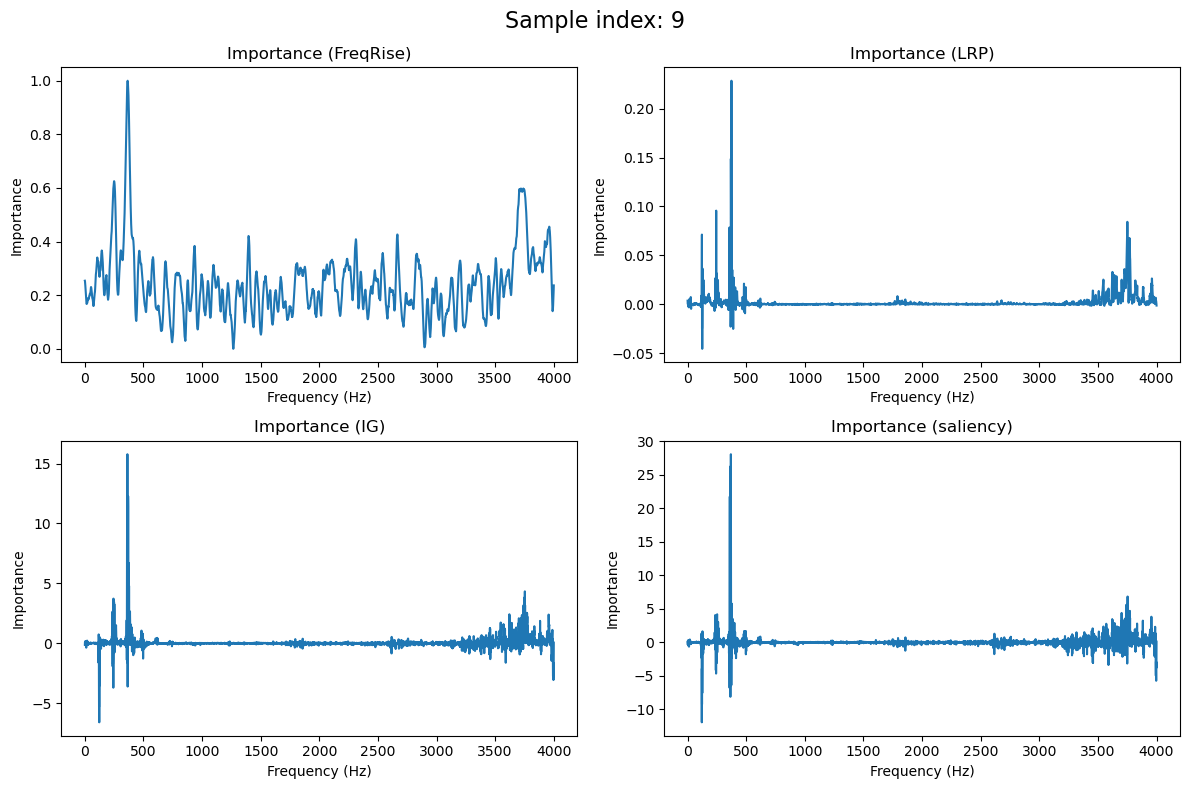

In [44]:
# Plotting saliency map for sample 
sample_idx = 6

N = 8000 # number of samples in time domain
fs = 8000 # sampling frequency

# Compute frequency axis
frequencies = torch.fft.rfftfreq(N, d=1/fs)

for sample_idx in range(10):
    # Saliency
    importance_freqrise = torch.tensor(attributions['freqrise_200_3000_lr_0.001_alpha_1.0_beta_0.01_decay_0.9_reinforce'][0][sample_idx])
    importance_lrp = torch.tensor(attributions['lrp'][0][sample_idx][0][0])
    importance_IG = torch.tensor(attributions['IG'][0][sample_idx][0][0])
    importance_saliency = torch.tensor(attributions['saliency'][0][sample_idx][0][0])

    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle(f"Sample index: {sample_idx}", fontsize=16)

    # Plot importance_freqrise
    axs[0, 0].plot(frequencies, importance_freqrise.numpy())
    axs[0, 0].set_title("Importance (FreqRise)")
    axs[0, 0].set_xlabel("Frequency (Hz)")
    axs[0, 0].set_ylabel("Importance")

    # Plot importance_lrp
    axs[0, 1].plot(frequencies, importance_lrp.numpy())
    axs[0, 1].set_title("Importance (LRP)")
    axs[0, 1].set_xlabel("Frequency (Hz)")
    axs[0, 1].set_ylabel("Importance")

    # Plot importance_IG
    axs[1, 0].plot(frequencies, importance_IG.numpy())
    axs[1, 0].set_title("Importance (IG)")
    axs[1, 0].set_xlabel("Frequency (Hz)")
    axs[1, 0].set_ylabel("Importance")

    # Plot importance_saliency
    axs[1, 1].plot(frequencies, importance_saliency.numpy())
    axs[1, 1].set_title("Importance (saliency)")
    axs[1, 1].set_xlabel("Frequency (Hz)")
    axs[1, 1].set_ylabel("Importance")

    plt.tight_layout()
    plt.show()